In [40]:
import pandas as pd

In [41]:
actor_movie = pd.read_csv('actorfilms.csv')  
movie_genre = pd.read_csv('IMDb_All_Genres_etf_clean1.csv')

In [42]:
actor_movie.rename(columns={"Film": "Movie_Title"}, inplace=True)

actor_movie 

,Actor,ActorID,Movie_Title,Year,Votes,Rating,FilmID
0,Fred Astaire,nm0000001,Ghost Story,1981,7731,6.3,tt0082449
1,Fred Astaire,nm0000001,The Purple Taxi,1977,533,6.6,tt0076851
2,Fred Astaire,nm0000001,The Amazing Dobermans,1976,369,5.3,tt0074130
3,Fred Astaire,nm0000001,The Towering Inferno,1974,39888,7.0,tt0072308
4,Fred Astaire,nm0000001,Midas Run,1969,123,4.8,tt0064664
...,...,...,...,...,...,...,...
191868,Roman Griffin Davis,nm9877392,Jojo Rabbit,2019,310904,7.9,tt2584384
191869,Lexi Rabe,nm9962642,Silk Road,2021,2050,5.9,tt7937254
191870,Lexi Rabe,nm9962642,Avengers: Endgame,2019,849079,8.4,tt4154796
191871,Lexi Rabe,nm9962642,Godzilla: King of the Monsters,2019,146737,6.0,tt3741700


In [43]:
movie_genre

,Movie_Title,Year,Director,Actors,Rating,Runtime(Mins),Censor,Total_Gross,main_genre,side_genre
0,Kantara,2022,Rishab Shetty,"Rishab Shetty, Sapthami Gowda, Kishore Kumar G...",9.3,148,UA,Gross Unkown,Action,"Adventure, Drama"
1,The Dark Knight,2008,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart, M...",9.0,152,UA,$534.86M,Action,"Crime, Drama"
2,The Lord of the Rings: The Return of the King,2003,Peter Jackson,"Elijah Wood, Viggo Mortensen, Ian McKellen, Or...",9.0,201,U,$377.85M,Action,"Adventure, Drama"
3,Inception,2010,Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellio...",8.8,148,UA,$292.58M,Action,"Adventure, Sci-Fi"
4,The Lord of the Rings: The Two Towers,2002,Peter Jackson,"Elijah Wood, Ian McKellen, Viggo Mortensen, Or...",8.8,179,UA,$342.55M,Action,"Adventure, Drama"
...,...,...,...,...,...,...,...,...,...,...
5557,Disaster Movie,2008,"Directors:Jason Friedberg, Aaron Seltzer","Carmen Electra, Vanessa Lachey, Nicole Parker,...",1.9,87,PG-13,$14.19M,Comedy,Sci-Fi
5558,The Hottie & the Nottie,2008,Tom Putnam,"Paris Hilton, Joel David Moore, Christine Laki...",1.9,91,PG-13,$0.03M,Comedy,Romance
5559,From Justin to Kelly,2003,Robert Iscove,"Kelly Clarkson, Justin Guarini, Katherine Bail...",1.9,81,PG,$4.92M,Comedy,"Musical, Romance"
5560,Superbabies: Baby Geniuses 2,2004,Bob Clark,"Jon Voight, Scott Baio, Vanessa Angel, Skyler ...",1.5,88,PG,$9.11M,Comedy,"Family, Sci-Fi"


In [62]:
df = pd.merge(actor_movie, movie_genre, on="Movie_Title")

In [63]:
df.drop_duplicates('Movie_Title', inplace=True)
df.reset_index(inplace=True)


In [64]:
df = df.drop(['index','ActorID','Actor','Year_y', 'Rating_y','Censor',], axis=1)
df = df.rename(columns={"Year_x": "Year", "Rating_x": "Rating"})

In [65]:
df

,Movie_Title,Year,Votes,Rating,FilmID,Director,Actors,Runtime(Mins),Total_Gross,main_genre,side_genre
0,The Towering Inferno,1974,39888,7.0,tt0072308,John Guillermin,"Paul Newman, Steve McQueen, William Holden, Fa...",165,$116.00M,Action,"Drama, Thriller"
1,Funny Face,1957,27534,7.0,tt0050419,Stanley Donen,"Audrey Hepburn, Fred Astaire, Kay Thompson, Mi...",103,Gross Unkown,Comedy,"Musical, Romance"
2,Birth,2004,34949,6.1,tt0337876,Jonathan Glazer,"Nicole Kidman, Cameron Bright, Lauren Bacall, ...",100,$5.01M,Drama,"Fantasy, Mystery"
3,Dogville,2003,139108,8.0,tt0276919,Lars von Trier,"Nicole Kidman, Paul Bettany, Lauren Bacall, Ha...",178,$1.53M,Crime,Drama
4,Misery,1990,186886,7.8,tt0100157,Rob Reiner,"James Caan, Kathy Bates, Richard Farnsworth, F...",107,$61.28M,Drama,Thriller
...,...,...,...,...,...,...,...,...,...,...,...
4639,Vikram Vedha,2017,29340,8.4,tt6148156,"Directors:Gayatri, Pushkar, Gowtham Selvaraj","Madhavan, Vijay Sethupathi, Shraddha Srinath, ...",147,Gross Unkown,Action,"Crime, Drama"
4640,Beasts of the Southern Wild,2012,81021,7.3,tt2125435,Benh Zeitlin,"Quvenzhané Wallis, Dwight Henry, Levy Easterly...",93,$12.80M,Adventure,"Drama, Fantasy"
4641,"I, Daniel Blake",2016,54727,7.9,tt5168192,Ken Loach,"Dave Johns, Hayley Squires, Sharon Percy, Bria...",100,$0.26M,Drama,Drama
4642,Kabir Singh,2019,26762,7.1,tt8983202,Sandeep Reddy Vanga,"Shahid Kapoor, Kiara Advani, Nikita Dutta, Soh...",173,Gross Unkown,Action,"Drama, Romance"


In [74]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

In [70]:
df['Actor_List'] = df['Actors'].str.split(', ')
df

,Movie_Title,Year,Votes,Rating,FilmID,Director,Actors,Runtime(Mins),Total_Gross,main_genre,side_genre,Actor_List
0,The Towering Inferno,1974,39888,7.0,tt0072308,John Guillermin,"Paul Newman, Steve McQueen, William Holden, Fa...",165,$116.00M,Action,"Drama, Thriller","[Paul Newman, Steve McQueen, William Holden, F..."
1,Funny Face,1957,27534,7.0,tt0050419,Stanley Donen,"Audrey Hepburn, Fred Astaire, Kay Thompson, Mi...",103,Gross Unkown,Comedy,"Musical, Romance","[Audrey Hepburn, Fred Astaire, Kay Thompson, M..."
2,Birth,2004,34949,6.1,tt0337876,Jonathan Glazer,"Nicole Kidman, Cameron Bright, Lauren Bacall, ...",100,$5.01M,Drama,"Fantasy, Mystery","[Nicole Kidman, Cameron Bright, Lauren Bacall,..."
3,Dogville,2003,139108,8.0,tt0276919,Lars von Trier,"Nicole Kidman, Paul Bettany, Lauren Bacall, Ha...",178,$1.53M,Crime,Drama,"[Nicole Kidman, Paul Bettany, Lauren Bacall, H..."
4,Misery,1990,186886,7.8,tt0100157,Rob Reiner,"James Caan, Kathy Bates, Richard Farnsworth, F...",107,$61.28M,Drama,Thriller,"[James Caan, Kathy Bates, Richard Farnsworth, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...
4639,Vikram Vedha,2017,29340,8.4,tt6148156,"Directors:Gayatri, Pushkar, Gowtham Selvaraj","Madhavan, Vijay Sethupathi, Shraddha Srinath, ...",147,Gross Unkown,Action,"Crime, Drama","[Madhavan, Vijay Sethupathi, Shraddha Srinath,..."
4640,Beasts of the Southern Wild,2012,81021,7.3,tt2125435,Benh Zeitlin,"Quvenzhané Wallis, Dwight Henry, Levy Easterly...",93,$12.80M,Adventure,"Drama, Fantasy","[Quvenzhané Wallis, Dwight Henry, Levy Easterl..."
4641,"I, Daniel Blake",2016,54727,7.9,tt5168192,Ken Loach,"Dave Johns, Hayley Squires, Sharon Percy, Bria...",100,$0.26M,Drama,Drama,"[Dave Johns, Hayley Squires, Sharon Percy, Bri..."
4642,Kabir Singh,2019,26762,7.1,tt8983202,Sandeep Reddy Vanga,"Shahid Kapoor, Kiara Advani, Nikita Dutta, Soh...",173,Gross Unkown,Action,"Drama, Romance","[Shahid Kapoor, Kiara Advani, Nikita Dutta, So..."


In [77]:
actors = np.unique(df['Actors'].str.split(', ').sum())
len(actors)

6649

In [101]:
if(not(np.isin(actors[0],df['Actor_List'][0]))):
    print(1)

1


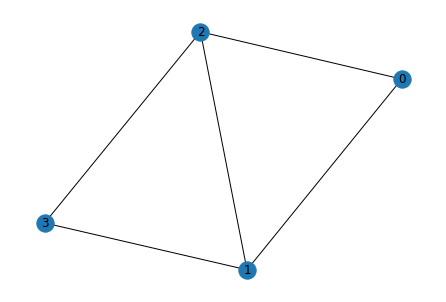

In [86]:


# Create an example adjacency matrix
adj_matrix = np.zeros((len(actors),len(actors)))

for i in range(len(actors)):
    for j in range(i+1,len(actors)):
        for k in range(len(df)):
            if(np.isin(actors[i],df[]))
        
        
# Create a graph from the adjacency matrix
G = nx.from_numpy_matrix(adj_matrix)

# Plot the graph using matplotlib
nx.draw(G, with_labels=True)